In [51]:
# Class of k-Nearest Neigbor Classifier
from sklearn import preprocessing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score

#importing sklearn's train_test_split method
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


class kNN():
    
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
    
    def normalize(self, train_X, test_X):
        scaler = MinMaxScaler(feature_range=(0, 1))
        x_train_scaled = scaler.fit_transform(train_X)
        x_train = pd.DataFrame(x_train_scaled)

        x_test_scaled = scaler.fit_transform(test_X)
        x_test = pd.DataFrame(x_test_scaled)
        return x_train, x_test

        
    
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test
    
    def getPrediction(self, X_test, clf):
            
        y_prediction = clf.getDiscreteClassification(X_test)
        Y_prediction = (y_prediction[0] + y_prediction[1] +y_prediction[2])/3    
        
        return Y_prediction
            
            

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    
    


TASK B
---

kNN on glass data set
---
No exp

In [52]:
#without EXP

##################################################
# Hold-out testing: Training and Test set creation
##################################################

#getting X and Y from glass and diabetes
data = pd.read_csv('glass.csv')
data.head()
gY = data['class']
gX = data.drop(['class'], axis = 1)

gX_train, gX_test, gY_train, gY_test = train_test_split(gX, gY, test_size = 0.34, random_state = 10)

data = pd.read_csv('diabetes.csv')
data.head()
dY = data['class']
dX = data.drop(['class'], axis = 1)

dX_train, dX_test, dY_train, dY_test = train_test_split(dX, dY, test_size =  0.34, random_state = 10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

#with norm
gtrainAccWithNorm = np.zeros(len(k_range))
gtestAccWithNorm = np.zeros(len(k_range))
#without norm
gtrainAccWithoutNorm = np.zeros(len(k_range))
gtestAccWithoutNorm = np.zeros(len(k_range))

#for Glass

index= 0
for k in k_range:
    
    #with normalization
    clf = kNN(k)
    #here normalize the data
    gX_train, gX_test= clf.normalize(gX_train, gX_test)
    clf.fit(gX_train, gY_train)
    gY_predTrain = clf.getDiscreteClassification(gX_train)
    gY_predTest = clf.getDiscreteClassification(gX_test)
    gtrainAccWithNorm[index] = accuracy_score(gY_train, gY_predTrain)
    gtestAccWithNorm[index] = accuracy_score(gY_test, gY_predTest)
    
    index+=1
    

index = 0 
for k  in  k_range:
    
    #without normalization
    clf = kNN(k)
    clf.fit(gX_train, gY_train)
    gY_predTrain = clf.getDiscreteClassification(gX_train)
    gY_predTest = clf.getDiscreteClassification(gX_test)
    gtrainAccWithoutNorm[index] = accuracy_score(gY_train, gY_predTrain)
    gtestAccWithoutNorm[index] = accuracy_score(gY_test, gY_predTest)
    
    index += 1


Text(0, 0.5, 'Accuracy')

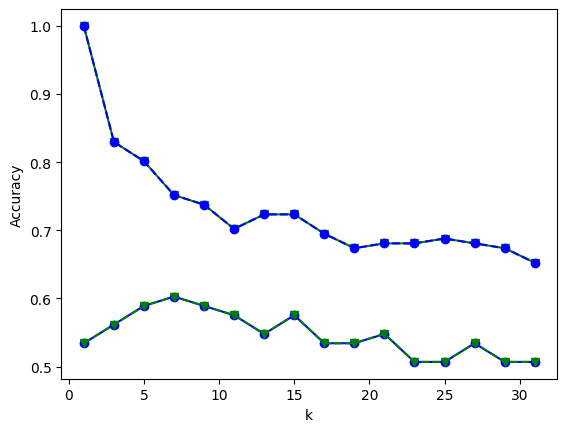

In [66]:
#########################################
# Plot of training and test accuracies
#########################################
#Plot the lines for data without being normalized
plt.plot(k_range,gtrainAccWithoutNorm,'gv-', k_range,gtestAccWithoutNorm,'bo-')

#Plot the lines for data that has been normalized
plt.plot(k_range,gtrainAccWithNorm, 'bo--', k_range, gtestAccWithNorm, 'gv--')



plt.xlabel('k')
plt.ylabel('Accuracy')

In the graph above you can see 4 different plotted lines. The top lines are X_test data accuracy with and without normalization. The bottom lines are X_train data accuracy with and without normaliztion. The reason why both lines from either X_train or X_test are pretty much the exact same is because there is no major difference between normalized and non-normalized data when the data set is so small. In diabetes, we'll be able to actually see the differences between normalized and non-normalized data. Thus, the accuracy remains unchanged even when normalization is applied in this case since normalization of data only reduces the redundancy of the data set.

kNN on diabetes data set
---
No exp

In [67]:
#without exp
#without norm
dtrainAccWithoutNorm = np.zeros(len(k_range))
dtestAccWithoutNorm = np.zeros(len(k_range))

data = pd.read_csv('diabetes.csv')
data.head()
dY = data['class']
dX = data.drop(['class'], axis = 1)

dX_train, dX_test, dY_train, dY_test = train_test_split(dX, dY, test_size =  0.34, random_state = 10)

#for diabetes
index = 0 
for k  in  k_range:
    
    #without normalization
    clf = kNN(k)
    clf.fit(dX_train, dY_train)
    dY_predTrain = clf.getDiscreteClassification(dX_train)
    dY_predTest = clf.getDiscreteClassification(dX_test)
    dtrainAccWithoutNorm[index] = accuracy_score(dY_train, dY_predTrain)
    dtestAccWithoutNorm[index] = accuracy_score(dY_test, dY_predTest)
    index+=1
    
#with normalization
dtrainAccWithNorm = np.zeros(len(k_range))
dtestAccWithNorm = np.zeros(len(k_range))
index = 0
for k in k_range:
    
    clf = kNN(k)
    #here normalize the data
    dX_train, dX_test = clf.normalize(dX_train, dX_test)
    #enter normalized X_train
    clf.fit(dX_train, dY_train)
    
    #rest is normal predicting and testing
    dY_predTrain = clf.getDiscreteClassification(dX_train)
    dY_predTest = clf.getDiscreteClassification(dX_test)
    dtrainAccWithNorm[index] = accuracy_score(dY_train, dY_predTrain)
    dtestAccWithNorm[index] = accuracy_score(dY_test, dY_predTest)
    
    index += 1



Text(0, 0.5, 'Accuracy')

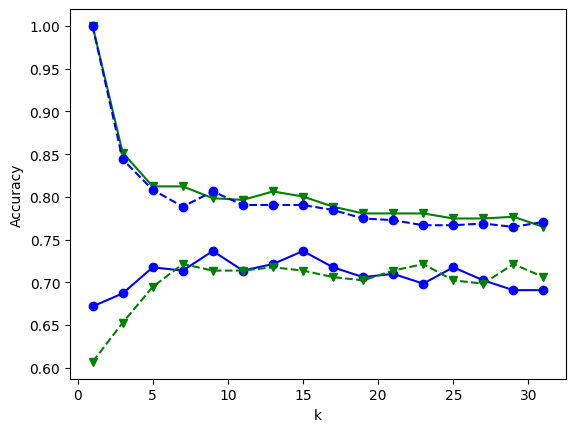

In [71]:
#########################################
# Plot of training and test accuracies
#########################################

#Plot the lines for data without being normalized
plt.plot(k_range, dtrainAccWithoutNorm,'gv-',k_range, dtestAccWithoutNorm,'bo-')

#Plot the lines for data that has been normalized
plt.plot(k_range, dtrainAccWithNorm, 'bo--', k_range, dtestAccWithNorm, 'gv--')

plt.xlabel('k')
plt.ylabel('Accuracy')

In the graph above we can clearly distinguish the data that has been normalized and the data that hasn't been. The solid green line is the non-normalized X_train and the dashed blue line is X_train with normalization. The solid blue line is the non-normalized X_test and the dashed green line is X_test with normalization. You can see that for X_test, the blue dashed line has much tighter accuracy margin from k = 1 to k = 31 (difference in accuracy: ~0.05) which makes sense since we normalized the data which reduces the redudancy of it. For the solid green line, the accuracies also have a tight margin but much more than the normalized X_test (difference in accuracy: ~0.4). This means that normalized data is better at precisely predicting k neighbours better than the non-normalized X_test. When we start looking at X_train though, we can see that the green dashed line (normalized X_train) has a massive difference in accuracy from k = 1 to ~ k = 7 (difference in accuracy: ~1.2) which makes sense because ultimately we don't want to use our training data to predict precise values. We are using the data to train our model. Thus implementing it for training is not such a good idea. Though the X_train data (dashed green line) at ~ k = 7 to k = 31 looks much better than the blue solid line. Ultimately, normalization helps keep the data on a common scale which helps with the accuracy rates being more precise (which is very good for predicting), but for training data it does not look like a good method to normalize mainly because we are not using training data to predict values. Therefore, it is better to normalize the X_test data as it seems to help with precision, but X_train does not need precision for training.

EXP
---

Text(0, 0.5, 'Accuracy')

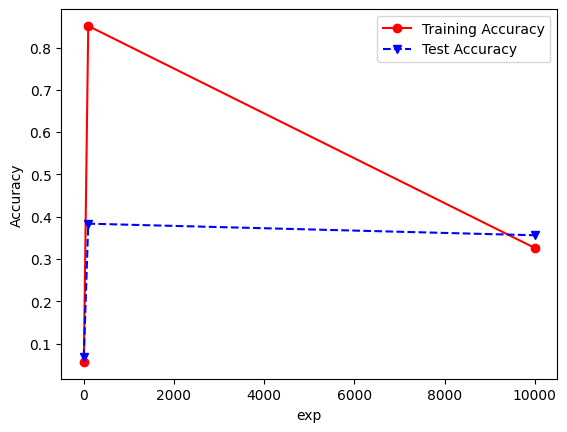

In [69]:
#with EXP

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from numpy.random import random

##################################################
# Hold-out testing: Training and Test set creation
##################################################

#getting X and Y from glass and diabetes
data = pd.read_csv('glass.csv')
data.head()
gY = data['class']
gX = data.drop(['class'], axis = 1)

gX_train, gX_test, gY_train, gY_test = train_test_split(gX, gY, test_size = 0.34, random_state = 10)

# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

gtrainAccWithNorm = np.zeros(len(exp_range))
gtestAccWithNorm = np.zeros(len(exp_range))

#without normalization
index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(gX_train, gY_train)
    gX_train, gX_test = clf.normalize(gX_train, gX_test)
    gY_predTrain = clf.getDiscreteClassification(gX_train)
    gY_predTest = clf.getDiscreteClassification(gX_test)
    gtrainAccWithNorm[index] = accuracy_score(gY_train, gY_predTrain)
    gtestAccWithNorm[index] = accuracy_score(gY_test, gY_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range, gtrainAccWithNorm,'ro-',exp_range,gtestAccWithNorm,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')


In the graph above we can see that when we are increasing the exp parameter for the Minkowski distance, our training accuracy quickly increases in accuracy and then quickly take a nose dive to the accuracy ~ 0.37, signifying that the start of the training for the model, it over estimates the accuracy and then slowly converges to it's actual accuracy the more we increase exp. Though when we look at the test accuracy, we can see that it immediately stops at ~ 0.38 and slowly also converges towards ~ 0.37. This shows that it's immediate prediction is quite accurate as we increase the exp. Which means the more we increase the exp number, the closer we will get to the true accuracy rate.

TASK D
---

In [ ]:
data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
print(data.head())
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.34, random_state = 10)

In [ ]:
#here we want to make the prediction
clf = kNN(k = 3)
clf.fit(X_train, Y_train)
Y_pred = clf.getPrediction(X_train, clf)

In [ ]:
#Explain error/performance of kNN using regression values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_pred)